# MLB各隊平均年齡與勝率的回歸分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
mpl.rc('font', family='Simhei')

## 資料來源

In [2]:
df_wr=pd.read_html('https://www.baseball-reference.com/leagues/MLB/2018-standings.shtml')
df_age=pd.read_html('http://www.espn.com/mlb/stats/rosters/_/sort/average_age/order/true')

## 把勝率統計網站中6個資料合併成一個

In [32]:
df_win = pd.concat([df_wr[0]], ignore_index=True)
for i in range(1,6):
    df_win = pd.concat([df_win,df_wr[i]], ignore_index=True)

In [5]:
df_win.head()

,Tm,W,L,W-L%,GB
0,Boston Red Sox,108,54,0.667,--
1,New York Yankees,100,62,0.617,8.0
2,Tampa Bay Rays,90,72,0.556,18.0
3,Toronto Blue Jays,73,89,0.451,35.0
4,Baltimore Orioles,47,115,0.290,61.0


## 整理年齡資料

In [6]:
df_age = df_age[0]
colnames = df_age.loc[1].values
df_age = df_age[2:]
df_age.columns = colnames

In [7]:
df_age.head()

,RK,TEAM,RHB,LHB,SH,RHP,LHP,HT,WT,AGE,YNG,OLD
2,1,Oakland,9,0,3,11,2,6-1,208,30.3,24,42
3,2,San Francisco,5,5,2,8,6,6-1,214,29.8,20,38
4,3,Washington,9,4,1,8,4,6-1,208,29.5,20,35
5,4,Chicago Cubs,6,4,2,8,5,6-2,209,29.3,24,37
6,5,Houston,10,3,0,10,2,6-1,205,29.3,24,36


## 依照隊名排序並重設index

In [8]:
df_age_1 = df_age.sort_values(by='TEAM')
df_win_1 = df_win.sort_values(by='Tm')

In [9]:
df_age_2 = df_age_1.reset_index()
df_win_2 = df_win_1.reset_index()

## 檢查一下

In [10]:
df_age_2.head()

,index,RK,TEAM,RHB,LHB,SH,RHP,LHP,HT,WT,AGE,YNG,OLD
0,23,22,Arizona,6,4,3,11,2,6-1,199,27.5,21,35
1,19,18,Atlanta,5,5,2,8,5,6-2,206,28.2,21,35
2,24,23,Baltimore,7,3,2,10,3,6-1,205,27.3,24,33
3,12,11,Boston,6,5,1,10,3,6-1,204,28.7,22,35
4,5,4,Chicago Cubs,6,4,2,8,5,6-2,209,29.3,24,37


In [11]:
df_win_2.head()

,index,Tm,W,L,W-L%,GB
0,27,Arizona Diamondbacks,82,80,0.506,9.5
1,15,Atlanta Braves,90,72,0.556,--
2,4,Baltimore Orioles,47,115,0.290,61.0
3,0,Boston Red Sox,108,54,0.667,--
4,21,Chicago Cubs,95,68,0.583,1.0


## 把所需資料提取出來並合併（隊名、平均年齡、勝率）

In [12]:
x = pd.concat([df_win_2['Tm'],df_age_2['AGE'],df_win_2['W-L%']],axis=1, ignore_index=True)

In [13]:
x.head()

,0,1,2
0,Arizona Diamondbacks,27.5,0.506
1,Atlanta Braves,28.2,0.556
2,Baltimore Orioles,27.3,0.290
3,Boston Red Sox,28.7,0.667
4,Chicago Cubs,29.3,0.583


In [14]:
x.columns = ['TEAM','AGE','WINRATE']

In [15]:
x.head()

,TEAM,AGE,WINRATE
0,Arizona Diamondbacks,27.5,0.506
1,Atlanta Braves,28.2,0.556
2,Baltimore Orioles,27.3,0.290
3,Boston Red Sox,28.7,0.667
4,Chicago Cubs,29.3,0.583


In [16]:
x = x[['AGE','WINRATE']].apply(pd.to_numeric)

## 分類訓練與測試資料

In [17]:
x1 = np.array(x.AGE)
x2 = np.array(x.WINRATE)

In [18]:
x1r = x1.reshape(30,1)

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x1r,x2,test_size = 0.3,random_state=5)

In [34]:
regr = LR()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
Y = regr.predict(x_test)

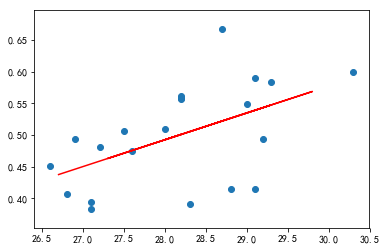

In [38]:
plt.scatter(x_train,y_train)
plt.plot(x_test,Y,'r')

In [46]:
r_squared = regr.score(x_train, y_train)
print('決定係數為',r_squared)

決定係數為 0.27658275428451495
